In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
Games_df = pd.read_csv('./Data/with_ratingvotes.csv')

# Display the first few rows
print(Games_df.head())

                         name    year  rating    votes  Action  Adventure  \
0                  Spider-Man  2018.0     9.2  20759.0    True       True   
1      Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2          Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                  God of War  2018.0     9.6  26118.0    True       True   
4  Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   

   Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  
0   False  False   False     True    False   False     False  
1   False   True   False    False    False   False     False  
2   False   True   False    False    False   False     False  
3   False  False   False    False    False   False     False  
4   False  False   False    False    False   False     False  


In [24]:
# Select features by removing name
features = Games_df.drop('name', axis=1)

In [25]:
# Convert boolean to intiger 
for column in features.columns:
    if features[column].dtype == bool:
        features[column] = features[column].astype(int)

print(features.dtypes)
features.head()

year         float64
rating       float64
votes        float64
Action         int32
Adventure      int32
Comedy         int32
Crime          int32
Family         int32
Fantasy        int32
Mystery        int32
Sci-Fi         int32
Thriller       int32
dtype: object


,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,2018.0,9.2,20759.0,1,1,0,0,0,1,0,0,0
1,2018.0,9.7,35703.0,1,1,0,1,0,0,0,0,0
2,2013.0,9.5,59986.0,1,0,0,1,0,0,0,0,0
3,2018.0,9.6,26118.0,1,1,0,0,0,0,0,0,0
4,2016.0,9.5,28722.0,1,1,0,0,0,0,0,0,0


In [26]:
# Normalize the data using Standard Scaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [27]:
# Since starting with a Kmeans (even though it might not be best for the dataset) and for that we use the "elbow methold" to find best number of clusters
inertia_values = []
num_clusters = list(range(1, 11))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [28]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia
elbow_data = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(10)

,num_clusters,inertia_values
0,1,128160.000000
1,2,116131.088216
2,3,104986.199843
3,4,94340.579972
4,5,84673.542051
5,6,75858.811948
6,7,69127.506751
7,8,62490.402966
8,9,55504.698543
9,10,49376.496170


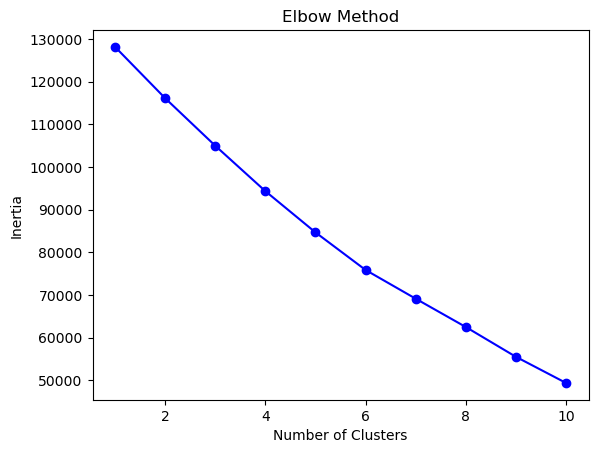

In [29]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [30]:
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [31]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia
elbow_data = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(20)

,num_clusters,inertia_values
0,1,128160.000000
1,2,116131.088216
2,3,104986.199843
3,4,94340.579972
4,5,84673.542051
5,6,75858.811948
6,7,69127.506751
7,8,62490.402966
8,9,55504.698543
9,10,49376.496170


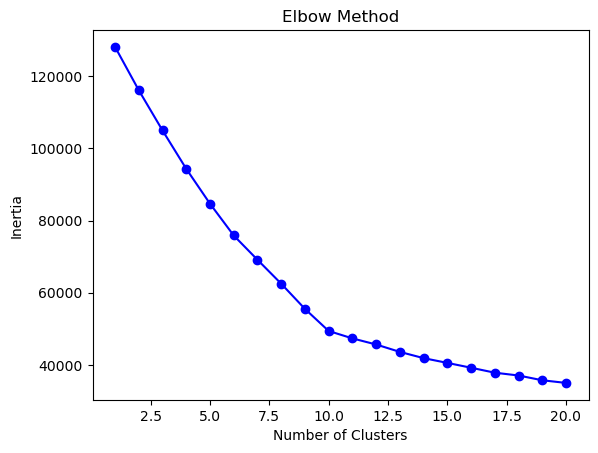

In [32]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [33]:
# Select another set of features by removing name and year
features_noyear = Games_df.drop(['name', 'year'], axis=1)

In [34]:
features_scaled_without_year = scaler.fit_transform(features_noyear)

In [35]:
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled_without_year)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [36]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia again
elbow_data2 = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow2 = pd.DataFrame(elbow_data2)

# Review the DataFrame
df_elbow2.head(20)

,num_clusters,inertia_values
0,1,117480.000000
1,2,105541.255568
2,3,94183.966893
3,4,83716.349251
4,5,74495.067959
5,6,66468.774864
6,7,59627.458579
7,8,49515.750008
8,9,43356.473592
9,10,39292.494478


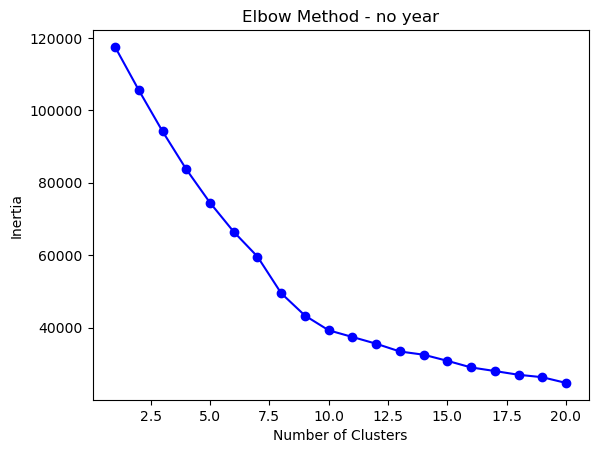

In [37]:
plt.plot(df_elbow2['num_clusters'], df_elbow2['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - no year')
plt.show()

In [38]:
# Initialize KMeans
kmeans_model = KMeans(n_clusters=9, random_state=1)

# Fit the model
kmeans_model.fit(features_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans_model.labels_

# Add these cluster assignments back to your DataFrame for further analysis
Games_df['Cluster'] = cluster_assignments

Games_df.head(10)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,0
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,7
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,7
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,2
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,2
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,2
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,3
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,7
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,2
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,2


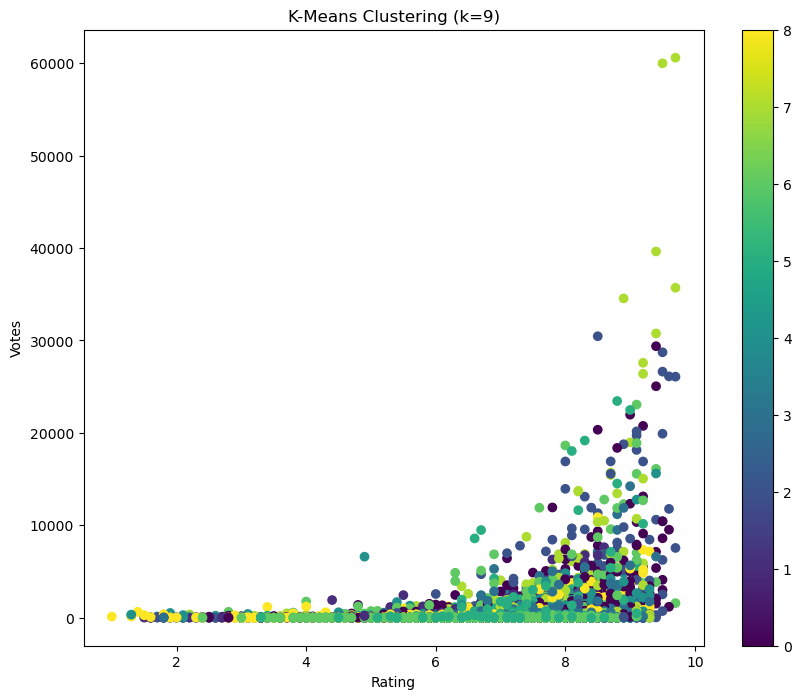

In [39]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Games_df['rating'], Games_df['votes'], c=Games_df['Cluster'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('K-Means Clustering (k=9)')
plt.colorbar(scatter)
plt.show()

We will not garner much of a multi-dimensional cluster with a 2D chart, as expected.  What we do see from this angel (Votes over Rating) is that many of the clusters cluster in the bottom right, or in other words, many of the rows do not have that many votes, so the scale is being thrown off a bit by this charts outliers up at 60K.  We also see that many of the titles might not have many, if any, votes.  However, the objective here is to see why/what got clustered by the ML; this chart does not say much.

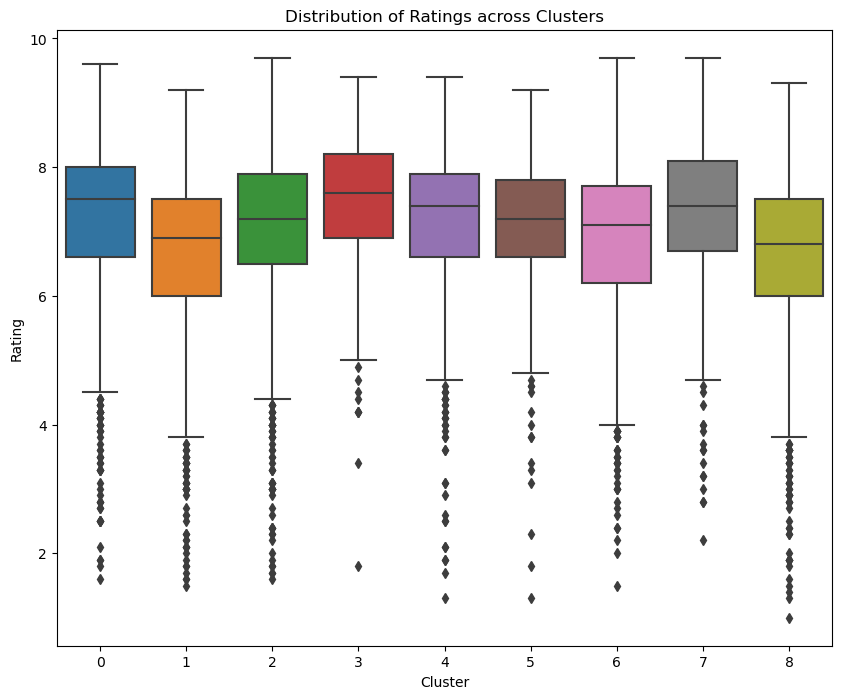

In [40]:
#  box plots to compare the distribution of ratings across the clusters

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='rating', data=Games_df)
plt.title('Distribution of Ratings across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()


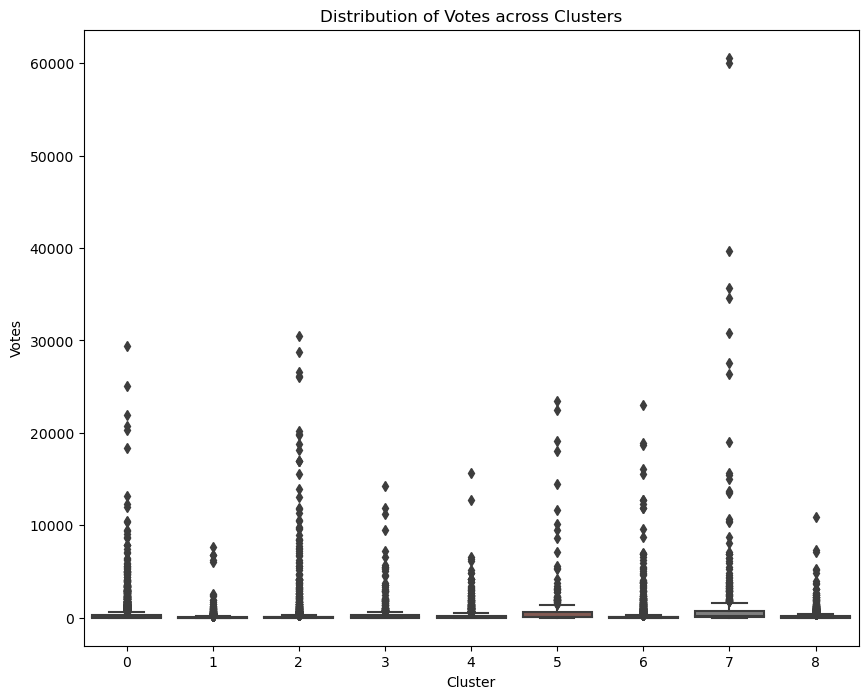

In [41]:
#  box plots to compare the distribution of votes across the clusters

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='votes', data=Games_df)
plt.title('Distribution of Votes across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Votes')
plt.show()


Humm... The box plot's don't seem to be explaining too much with the clustering.  Might need to try a different approach.

In [42]:
# This function calculates the mean of each genre column in a given cluster dataframe
def compute_genre_proportions(cluster_df):
    proportions = cluster_df.iloc[:, 4:-1].mean()
    return proportions

In [43]:
# apply this function to each cluster and gather the results in a new dataframe

genre_proportions = pd.DataFrame()
for cluster in range(9):
    cluster_df = Games_df[Games_df['Cluster'] == cluster]
    proportions = compute_genre_proportions(cluster_df)
    genre_proportions = genre_proportions.append(proportions, ignore_index=True)


C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_14676\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_14676\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_14676\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_14676\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be

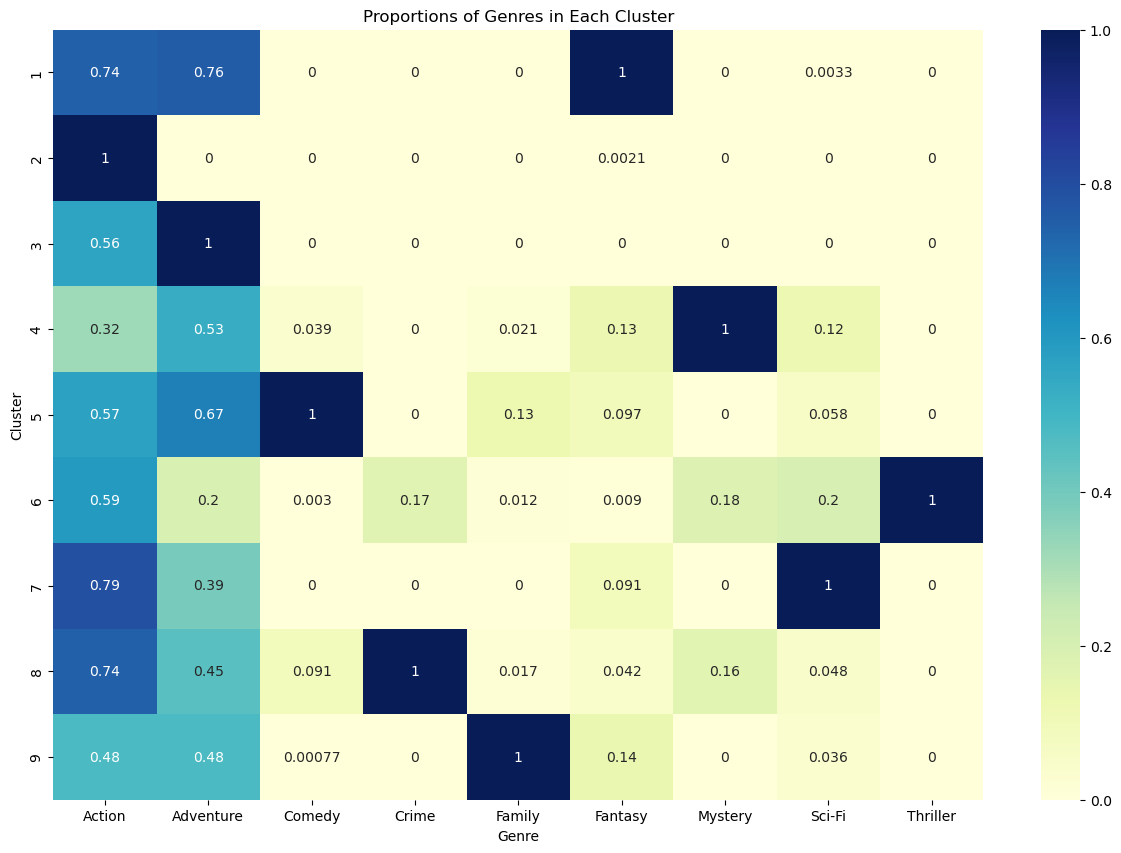

In [44]:
# plot this information in a bar plot

plt.figure(figsize=(15, 10))
ax = sns.heatmap(data=genre_proportions, annot=True, cmap="YlGnBu")
ax.set_yticklabels(range(1, 10))  # This line changes the y-axis labels
plt.title('Proportions of Genres in Each Cluster')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()



Let's see if we can understand what is going on with the clustering with a PCA.  This should make it so we can "graph" multi-dimensional clustering on a two-dimensional plane (hopefully).  
Using two principal components, we should be able to plot the data points and then color-code them by cluster to visualize clustering results in a two-dimensional plot. 

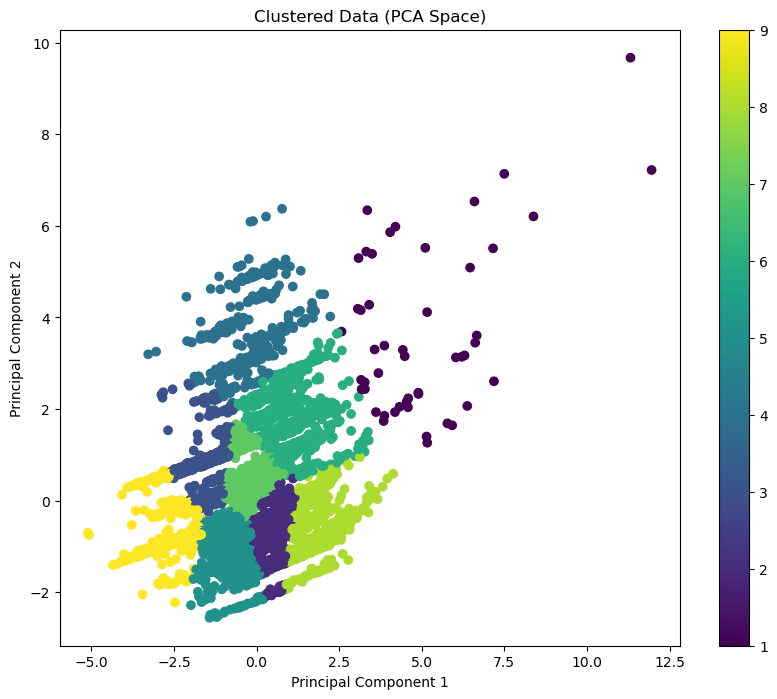

In [45]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Run KMeans clustering on the principal components
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=1)
clusters = kmeans.fit_predict(principalComponents)

# Add 1 to all cluster labels to shift them from 0-8 to 1-9
clusters += 1

# Add the cluster labels to your PCA dataframe
principalDf['cluster'] = clusters

# Plot the data points in the space of first two principal components, color-coded by cluster
plt.figure(figsize=(10,8))
scatter = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA Space)')
plt.colorbar(scatter)
plt.show()


It is a pretty chart, but what is it telling us?  From the chart, we can see the "borders" of the clusters.  Plotting PCA2 over PCA1 and "squishing" the multidimensional space into a 2D space paints a better picture than our first scatter chart.  At least in showing off the clusters.  But is this a good representation of what the clustering did?  Time for a bit of analysis. 
First, let's examine the feature loading or what features had the most weight in each PCA.

In [46]:
# Get the feature loadings
loadings = pca.components_

# Create a dataframe that contains the loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features.columns)

# Print the dataframe
print(loadings_df)


                PC1       PC2
year       0.410954  0.125215
rating     0.492679  0.116633
votes      0.326266  0.229865
Action     0.023242  0.052798
Adventure  0.440211 -0.325593
Comedy     0.089195 -0.123621
Crime      0.097418  0.427815
Family    -0.273180 -0.283611
Fantasy    0.296770 -0.365975
Mystery    0.114154  0.353247
Sci-Fi    -0.306913  0.242892
Thriller  -0.015418  0.461108


Looking at the PC1 column, the features rating, year, Adventure, and votes have the highest absolute values, suggesting that they contribute most to the variance along the first principal component.
On the other hand, looking at the PC2 column, Thriller, Crime, Sci-Fi, and Fantasy have the highest absolute values, suggesting that they contribute most to the variance along the second principal component.

What about the variance?

In [47]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

Explained Variance:  [0.13326569 0.11851359]


Reducing it to two principal components only accounts for about 25% of the variance.  This might not be the best representation of the data.  
Lets take a look to see how may PCAs it would take to explaine best witout using the same number of PCA to original featuers.

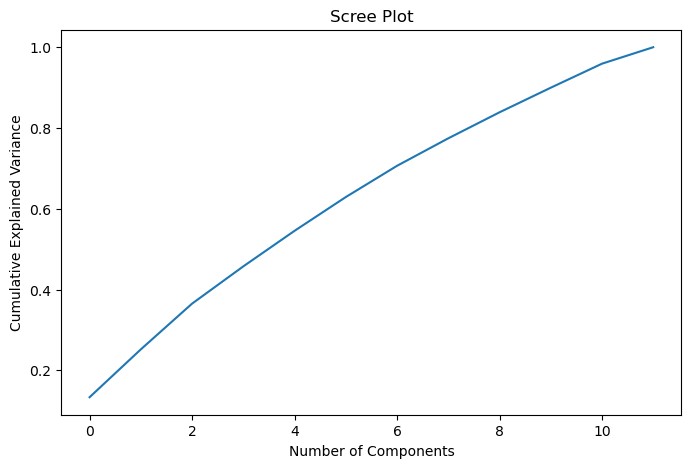

In [48]:
# Let's fit PCA with more components
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [49]:
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(explained_variance > 0.95)[0][0] + 1

print(f"To explain 95% of variance we need {num_components} principal components.")


To explain 95% of variance we need 11 principal components.


It is a curve with no well-defined elbow.  PCA may have helped show where some of the clusters are happening, but in trying to keep it two-dimensional for understanding, it is not the best representation for this dataset using KMeans.

Can we gain anything from the original KMeans model with the 9 clusters? Let's try a little more analysis.

In [50]:
print(Games_df['Cluster'].value_counts())


0    2095
2    1842
6    1621
1    1441
8    1297
4    1007
7     525
3     519
5     333
Name: Cluster, dtype: int64


In [51]:
# The cluster_centers_ attribute of the KMeans model gives the coordinates of the cluster centroids in the scaled feature space.
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=features.columns)

print(centroids)

       year    rating     votes    Action  Adventure    Comedy     Crime  \
0  0.089022  0.199709  0.036528  0.134342   0.406319 -0.334892 -0.239855   
1 -0.005780 -0.288212 -0.167565  0.684418  -1.114789 -0.334892 -0.239855   
2  0.203400  0.069760  0.025611 -0.253330   0.894846 -0.334892 -0.239855   
3  0.291533  0.360263  0.019833 -0.768100  -0.044920 -0.206917 -0.239855   
4  0.152313  0.103155 -0.062013 -0.229534   0.223760  2.986040 -0.239855   
5  0.400965  0.063850  0.245802 -0.183215  -0.722092 -0.324919  0.514845   
6 -0.338045 -0.091508 -0.040195  0.236243  -0.336621 -0.334892 -0.239855   
7  0.094757  0.217516  0.549429  0.134635  -0.210428 -0.031264  4.160786   
8 -0.379968 -0.315768 -0.104266 -0.434771  -0.153087 -0.332331 -0.239855   

     Family   Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.396354  1.756614 -0.257476 -0.454492 -0.179397  
1 -0.396354 -0.564435 -0.257476 -0.463252 -0.179397  
2 -0.396354 -0.569277 -0.257476 -0.463252 -0.179397  
3 -0.334479 -0.264536  

We have scaled the data before applying KMeans. This scaling procedure typically involves subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features are on a similar scale and that one feature does not dominate the others due to its scale.

As a result, the values in the above output are expressed in terms of standard deviations from the mean of the entire dataset.

In [56]:
# Example: Analyze games in cluster 4
cluster_5_games = Games_df[Games_df['Cluster'] == 5]
print(cluster_5_games)
cluster_5_games.to_csv('./Data/KMeansClusters/cluster_5_games.csv', index=False)


                                 name  year  rating    votes  Action  \
32       Call of Duty: Modern Warfare  2019     8.4   5256.0    True   
73            Call of Duty: Black Ops  2010     8.3  19173.0    True   
77     Call of Duty: Modern Warfare 2  2009     8.8  23450.0    True   
116                 Quantum of Solace  2008     6.7   9489.0    True   
153    Call of Duty 4: Modern Warfare  2007     9.0  22483.0    True   
...                               ...   ...     ...      ...     ...   
10675                            Jaws  1987     5.3    164.0   False   
10676                    Do you copy?  2017     7.9     17.0   False   
10677               A Night in Berlin  2020     5.4      6.0    True   
10678                    Road to Hell  2013     6.0     30.0   False   
10679                         Revenge  2012     5.1     25.0   False   

       Adventure  Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  \
32         False   False  False   False    False    Fals

In [53]:
# Convert 'year' from float to int for easier processing
Games_df['year'] = Games_df['year'].astype(int)

# Create time bins for 'year' and add as a new column
Games_df['time_period'] = pd.cut(Games_df['year'], bins=range(1950, 2030, 10), labels=range(1950, 2020, 10))

# Now 'time_period' is a categorical variable representing the decade a game was released

In [54]:
# Loop over each time period
for time_period in Games_df['time_period'].unique():
    
    # Subset the DataFrame for the current time period
    time_period_df = Games_df[Games_df['time_period'] == time_period]

    # Standardize the features
    features = time_period_df[['rating', 'votes', 'Action', 'Adventure', 
    'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=9, random_state=1)
    kmeans_model.fit(features_scaled)

    # Add the cluster assignments back to the DataFrame
    time_period_df['Cluster'] = kmeans_model.labels_

    # Display the centroid coordinates for this time period
    centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=features.columns)
    print(f"Centroids for {time_period}:\n")
    print(centroids)

    # Here you might also want to add some code to visualize the clusters
    # This could involve creating a pie chart or bar plot for each cluster,
    # showing the proportions of each genre within the cluster.


d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_14676\3024123906.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


Centroids for 2010:

     rating     votes    Action  Adventure    Comedy     Crime    Family  \
0 -0.020913 -0.086352  0.107508  -0.312899 -0.346317 -0.232073 -0.321888   
1 -0.201908 -0.135969 -0.280093  -0.029464 -0.052332 -0.232073  3.106666   
2 -0.177680 -0.118027  0.121346   0.003489 -0.346317 -0.232073 -0.321888   
3  0.182650 -0.035050  0.204675   0.380280 -0.346317 -0.232073 -0.321888   
4  0.297353 -0.041042 -0.948043  -0.292115 -0.225426 -0.232073 -0.257803   
5  1.561996  8.471384  0.627429   0.582998 -0.238523  0.676140 -0.321888   
6  0.001095 -0.111716 -0.084085   0.252473  2.887525 -0.232073 -0.321888   
7  0.278640  0.153575  0.221701  -0.260884 -0.002722  4.308992 -0.279032   
8 -0.055087  0.039115 -0.437432  -0.884812 -0.325454  0.119494 -0.277649   

    Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.342532 -0.287551  2.445396 -0.216539  
1 -0.222759 -0.287551 -0.328402 -0.216539  
2 -0.577461 -0.287551 -0.408932 -0.216539  
3  1.731719 -0.287551 -0.408932 -0.216539 

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by StandardScaler.